In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
# Load data
data = pd.read_csv("loan_approval_dataset.csv")

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_valu

In [4]:
# Check the shape of the dataset
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(4269, 13)


In [5]:
# Check the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


In [6]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


In [7]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(data.describe())


Summary statistics for numerical columns:
           loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6

In [8]:
# Distribution of the target variable
print("\nDistribution of the target variable:")
print(data[' loan_status'].value_counts())


Distribution of the target variable:
 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64


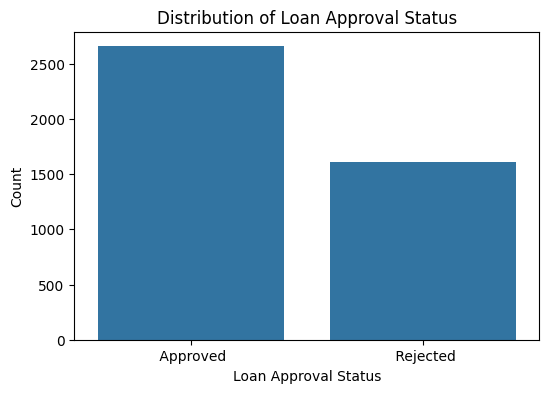

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=' loan_status', data=data)
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.show()

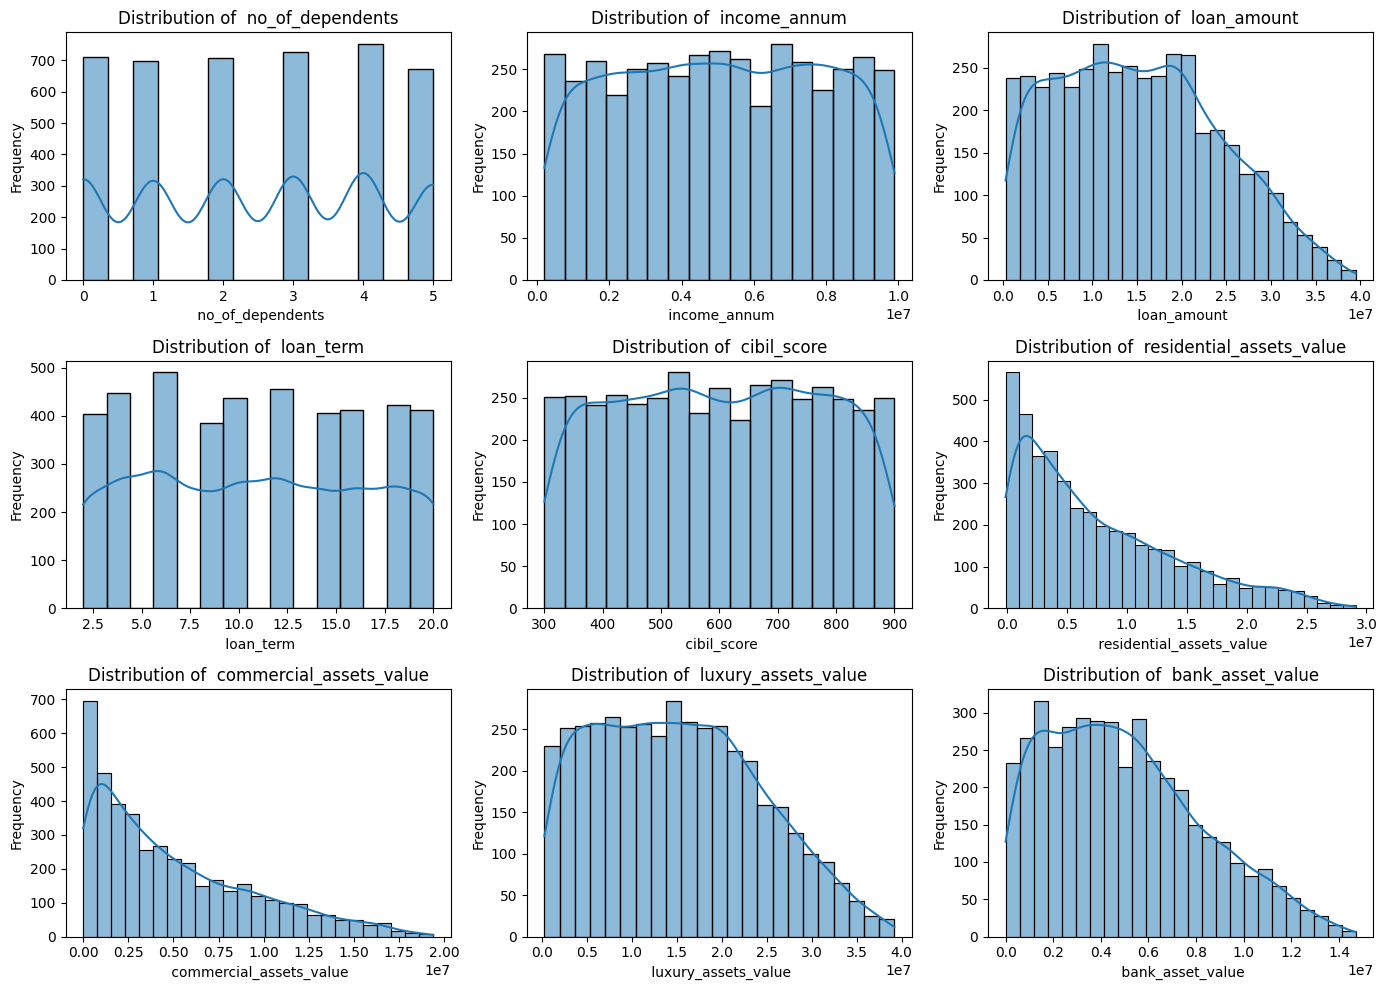

In [10]:
# Visualize the distribution of numerical features
numerical_features = [' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', 
                      ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', 
                      ' bank_asset_value']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [11]:
# Select only numerical columns for correlation analysis
numerical_data = data.select_dtypes(include=np.number)

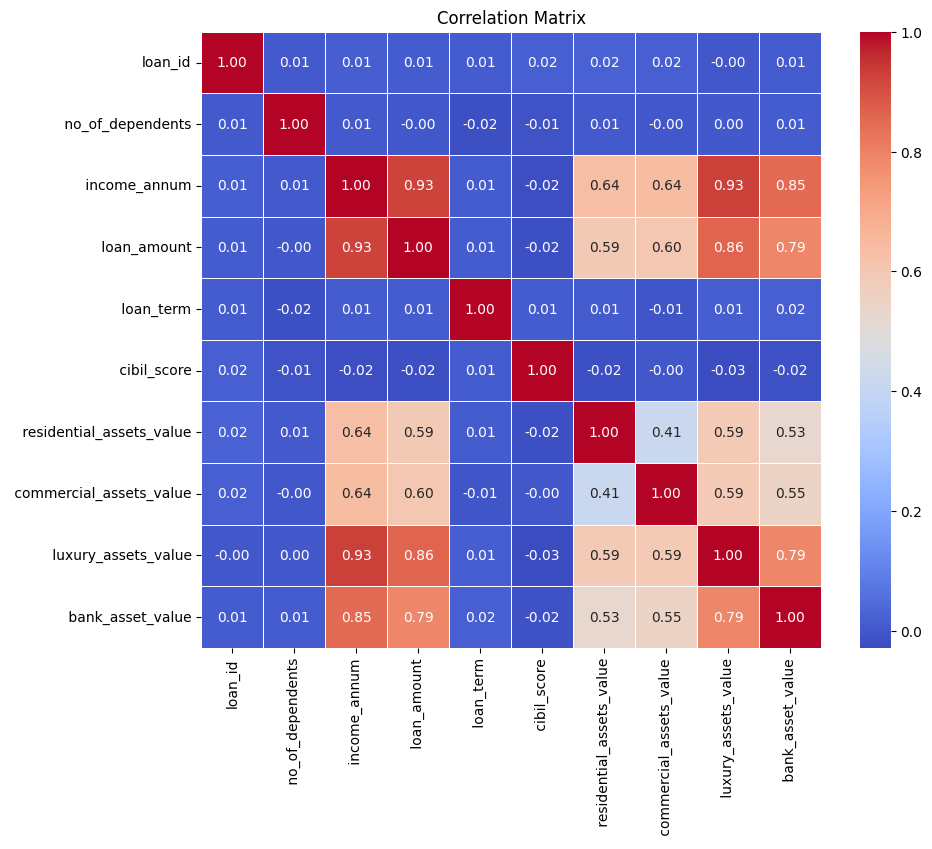

In [12]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [13]:
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


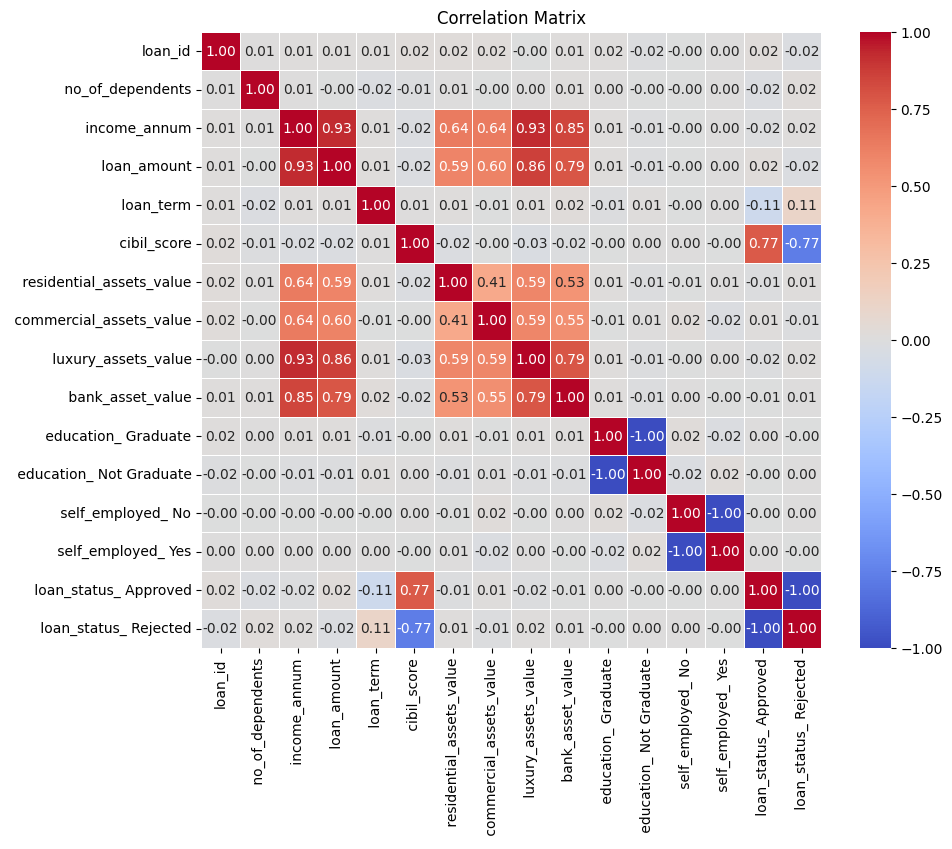

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv("loan_approval_dataset.csv")

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=[' education', ' self_employed', ' loan_status'])

# Perform correlation analysis
correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



Best parameter: {'n_neighbors': 43, 'p': 1, 'weights': 'distance'}
Classification Report (Before Feature Engineering):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       531
           1       0.90      0.94      0.92       323

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854



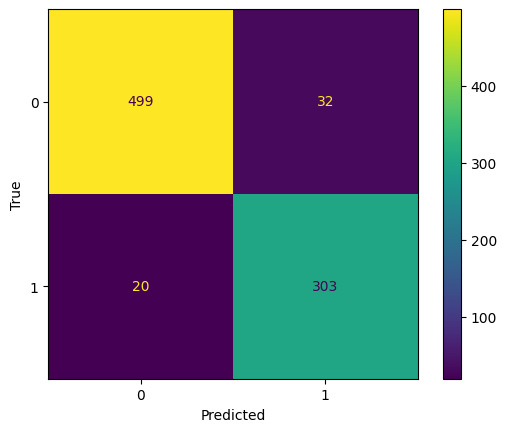

In [15]:


# Load data
data = pd.read_csv("loan_approval_dataset.csv")

# Encode categorical variables
le = LabelEncoder()
data[' education'] = le.fit_transform(data[' education'])
data[' self_employed'] = le.fit_transform(data[' self_employed'])
data[' loan_status'] = le.fit_transform(data[' loan_status'])

# Select features and target variable
X = data[[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score']]
y = data[' loan_status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,100,2),
           'weights': ['uniform', 'distance'],
           'p': [1, 2]}
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameter
print("Best parameter:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test_scaled)

# Model Evaluation
print("Classification Report (Before Feature Engineering):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
cm.ax_.set_xlabel('Predicted')
cm.ax_.set_ylabel('True')
plt.show()


## Feature Engineering

C:\Users\kavya\AppData\Local\Temp\ipykernel_18740\3539225400.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_amount_loan_status = data.groupby('LoanAmountBin')[' loan_status'].value_counts(normalize=True).unstack()


 loan_status          0         1
LoanAmountBin                    
Very Low       0.651163  0.348837
Low            0.607870  0.392130
Moderate       0.601010  0.398990
High           0.618355  0.381645
Very High      0.675472  0.324528


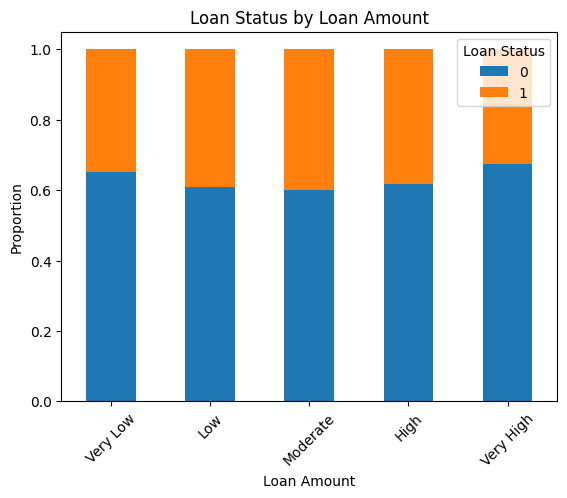

In [16]:
# Define bins and labels for loan amount
bins_loan_amount = [0, 5000000, 10000000, 15000000, 30000000, float('inf')]
labels_loan_amount = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Create a new column 'LoanAmountBin' with bins for loan amount
data['LoanAmountBin'] = pd.cut(data[' loan_amount'], bins=bins_loan_amount, labels=labels_loan_amount)

# Analyze loan status for each loan amount bin
loan_amount_loan_status = data.groupby('LoanAmountBin')[' loan_status'].value_counts(normalize=True).unstack()
print(loan_amount_loan_status)

# Plot the results
loan_amount_loan_status.plot(kind='bar', stacked=True)
plt.title('Loan Status by Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


It can be inferred that Loan Amount does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the loan amount is low the chances of loan approval will be high.

We will analyze the income_annum in similar manner

C:\Users\kavya\AppData\Local\Temp\ipykernel_18740\2381840540.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_loan_status = data.groupby('IncomeBin')[' loan_status'].value_counts(normalize=True).unstack()


 loan_status         0         1
IncomeBin                       
Very Low      0.639384  0.360616
Low           0.608989  0.391011
Moderate      0.603795  0.396205
High          0.627702  0.372298
Very High     0.000000  0.000000


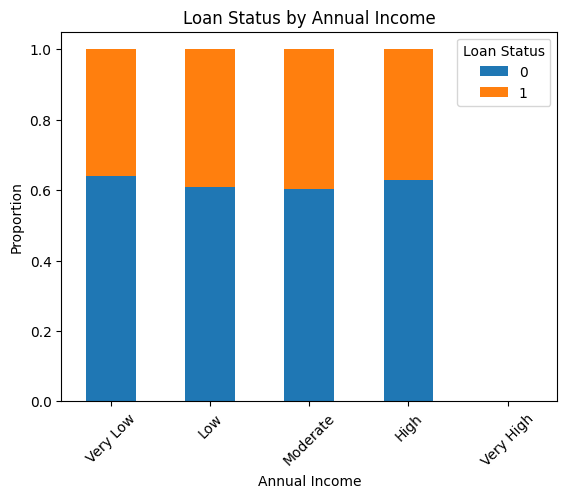

In [17]:
# Define bins and labels for annual income
bins_annual_income = [0, 3000000, 5000000, 7000000, 10000000, float('inf')]
labels_annual_income = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']

# Create a new column 'IncomeBin' with bins for annual income
data['IncomeBin'] = pd.cut(data[' income_annum'], bins=bins_annual_income, labels=labels_annual_income)

# Analyze loan status for each income bin
income_loan_status = data.groupby('IncomeBin')[' loan_status'].value_counts(normalize=True).unstack()
print(income_loan_status)

# Plot the results
income_loan_status.plot(kind='bar', stacked=True)
plt.title('Loan Status by Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


It can be inferred that Annual Income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the Annual income is high the chances of loan approval will be high.

We will analyze the debt_to_income_ratio in similar manner

In [18]:
data['debt_to_income_ratio'] = data[' loan_amount'] / data[' income_annum']
# Convert the debt_to_income_ratio column to integers
data['debt_to_income_ratio'] = data['debt_to_income_ratio'].round(2)
data['debt_to_income_ratio']

0       3.11
1       2.98
2       3.26
3       3.74
4       2.47
        ... 
4264    2.30
4265    3.42
4266    3.68
4267    3.12
4268    3.23
Name: debt_to_income_ratio, Length: 4269, dtype: float64

C:\Users\kavya\AppData\Local\Temp\ipykernel_18740\1623202054.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  debt_to_income_loan_status = data.groupby('DebtToIncomeBin')[' loan_status'].value_counts(normalize=True).unstack()


 loan_status            0         1
DebtToIncomeBin                    
Very Low         0.333333  0.666667
Low              0.543860  0.456140
Moderate         0.569082  0.430918
High             0.598299  0.401701
Very High        0.654832  0.345168
Extremely High   0.677543  0.322457


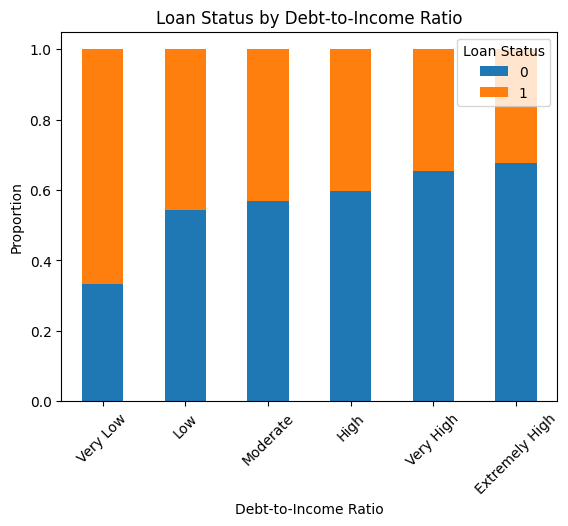

In [19]:
# Define bins and labels for debt-to-income ratio
bins_debt_to_income = [0,1.5,2,2.5,3,3.5, float('inf')]
labels_debt_to_income = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']

# Create a new column 'DebtToIncomeBin' with bins for debt-to-income ratio
data['DebtToIncomeBin'] = pd.cut(data['debt_to_income_ratio'], bins=bins_debt_to_income, labels=labels_debt_to_income)

# Analyze loan status for each debt-to-income bin
debt_to_income_loan_status = data.groupby('DebtToIncomeBin')[' loan_status'].value_counts(normalize=True).unstack()
print(debt_to_income_loan_status)

# Plot the results
debt_to_income_loan_status.plot(kind='bar', stacked=True)
plt.title('Loan Status by Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()


It shows that if debt_to_income ratio is low, chances of approval of loan is  high.

In [20]:
# Feature Engineering 
data['debt_to_income_ratio'] = data[' loan_amount'] / data[' income_annum']
data['total_assets_value'] = data[' residential_assets_value'] + data[' commercial_assets_value'] + data[' luxury_assets_value']
data['asset_to_loan_ratio'] = data['total_assets_value'] / data[' loan_amount']
data['loan_amount_term_ratio'] = data[' loan_amount'] / data[' loan_term']
data['balanced_income'] = data[' income_annum'] - data['loan_amount_term_ratio']

Best parameter: {'n_neighbors': 25, 'p': 1, 'weights': 'distance'}
Classification Report (After Feature Engineering):
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.94      0.86      0.90       323

    accuracy                           0.93       854
   macro avg       0.93      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854



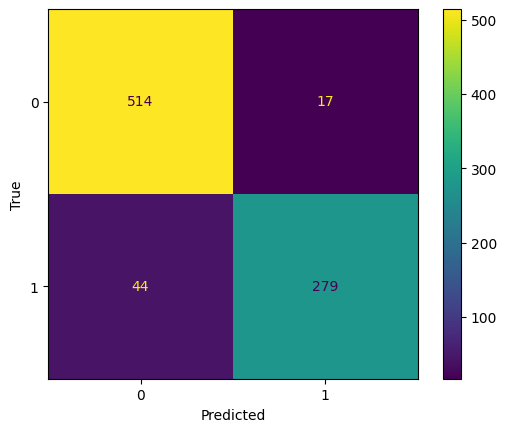

In [21]:

# Encode categorical variables
le = LabelEncoder()
data[' education'] = le.fit_transform(data[' education'])
data[' self_employed'] = le.fit_transform(data[' self_employed'])
data[' loan_status'] = le.fit_transform(data[' loan_status'])

# Select features and target variable
X = data[[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
          ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value',
          'debt_to_income_ratio', 'total_assets_value', 'asset_to_loan_ratio', 'loan_amount_term_ratio', 'balanced_income']]
y = data[' loan_status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,100,2),
           'weights': ['uniform', 'distance'],
           'p': [1, 2]}
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameter
print("Best parameter:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test_scaled)

# Model Evaluation
print("Classification Report (After Feature Engineering):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
cm.ax_.set_xlabel('Predicted')
cm.ax_.set_ylabel('True')
plt.show()


Best parameter: {'n_neighbors': 69, 'p': 1, 'weights': 'distance'}
Classification Report (After Feature Engineering):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       531
           1       0.93      0.90      0.92       323

    accuracy                           0.94       854
   macro avg       0.94      0.93      0.93       854
weighted avg       0.94      0.94      0.94       854



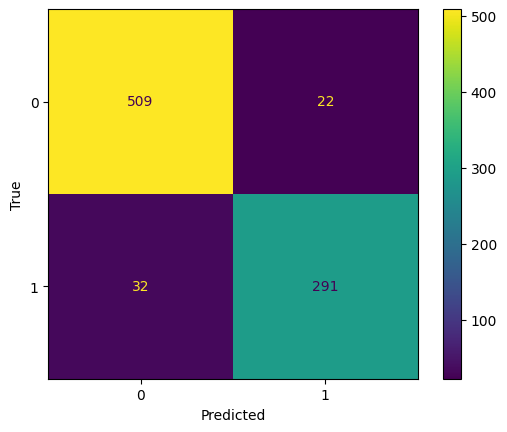

In [22]:
# Encode categorical variables
le = LabelEncoder()
data[' education'] = le.fit_transform(data[' education'])
data[' self_employed'] = le.fit_transform(data[' self_employed'])
data[' loan_status'] = le.fit_transform(data[' loan_status'])

# Select features and target variable
X = data[[' no_of_dependents', ' education', ' self_employed', ' cibil_score', ' bank_asset_value',
          'debt_to_income_ratio', 'total_assets_value', 'asset_to_loan_ratio', 'loan_amount_term_ratio', 'balanced_income']]
y = data[' loan_status']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,100,2),
           'weights': ['uniform', 'distance'],
           'p': [1, 2]}
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameter
print("Best parameter:", grid_search.best_params_)

# Predictions
y_pred = grid_search.predict(X_test_scaled)

# Model Evaluation
print("Classification Report (After Feature Engineering):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
cm.ax_.set_xlabel('Predicted')
cm.ax_.set_ylabel('True')
plt.show()
